In [19]:
from tidy_data import df_speeches_cleanned

df_cleanned = df_speeches_cleanned.copy()


In [21]:
#Use textblob in python: https://www.kaggle.com/code/blessondensil294/beginner-nlp-product-sentiment-analysis-textblob 

import pandas as pd
from textblob import TextBlob

df_sentiment_blob = pd.DataFrame(columns=['date', 'speaker','party','text', 'sentiment', 'subjectivity'])

# temporary list to store the dictionaries
result_data = []

# Loop through the df
for index, row in df_cleanned.iterrows():
    # Get data from df columns
    text = row['text']
    date = row['date']
    party = row['party']
    speaker = row['speaker']

    # Get the sentiment and subjectivity
    sentiment, subjectivity = TextBlob(text).sentiment

    # Append the results to the list
    result_data.append({
        'date': date,
        'speaker': speaker,
        'party': party,
        'speech': text,
        'sentiment': sentiment,
        'subjectivity': subjectivity
    })

# Create a DataFrame from the list of dictionaries
df_sentiment_blob = pd.DataFrame(result_data)


C:\Users\augus\AppData\Local\Temp\ipykernel_12128\3640999438.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  scatter_plot.set_xticklabels(scatter_plot.get_xticklabels(), rotation=45, horizontalalignment='right')


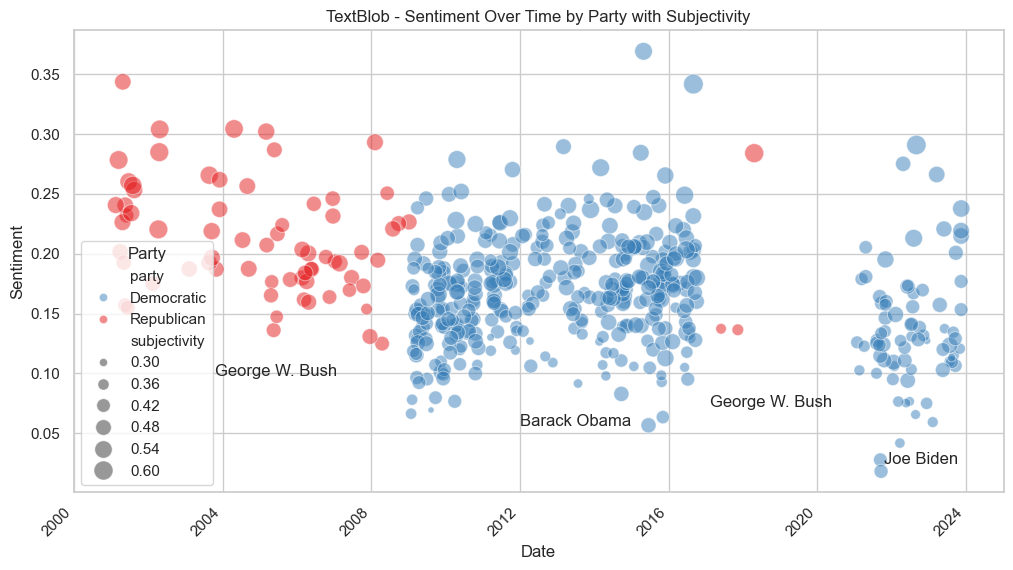

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot style
sns.set(style="whitegrid")
palette = sns.color_palette("Set1", n_colors=2)[::-1]

# Create a scatter plot
plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(
    data=df_sentiment_blob,
    x='date',
    y='sentiment',
    hue='party',
    palette=palette,
    size='subjectivity',  
    sizes=(20, 200), 
    alpha=0.5
)

# Set labels and title
plt.title('TextBlob - Sentiment Over Time by Party with Subjectivity')
plt.xlabel('Date')
plt.ylabel('Sentiment')

# legend
plt.legend(title='Party', loc='best')

# date formatting
scatter_plot.set_xticklabels(scatter_plot.get_xticklabels(), rotation=45, horizontalalignment='right')


### Include the speaker name in the chart
# Define time intervals
time_intervals = [(2000, 2008), (2008, 2017), (2017, 2020), (2020, 2024)]

for interval in time_intervals:
    start, end = interval
    interval_data = df_sentiment_blob[(df_sentiment_blob['date'].dt.year >= start) & (df_sentiment_blob['date'].dt.year < end)]
    
    mean_date = interval_data['date'].mean()
    mean_sentiment = interval_data['sentiment'].mean()
    
    # Use the first speaker in the interval for annotation
    speaker = interval_data['speaker'].iloc[0]
    
    plt.annotate(speaker,
                 (mean_date, mean_sentiment),
                 textcoords="offset points",
                 xytext=(-20, -100),
                 va='bottom')



plt.show()


In [9]:
# What are the lowest sentiment speeches?

# Sort the DataFrame by 'sentiment'
df_lowest_sentiment_blob = df_sentiment_blob.sort_values(by='sentiment')


# Create a string
result_phrase = ""
for index, row in lowest_sentiment_df.head(5).iterrows(): # 5 lowest sentiment speeches
    result_phrase += f"{row['speaker']} from {row['party']} gave a speech on {row['date']} with sentiment {row['sentiment']:.4f} and subjectivity {row['subjectivity']:.4f}. The speech was:\n{row['speech']}\n\n"

# Print the result
print(result_phrase)


Joe Biden from Democratic gave a speech on 2021-09-20 00:00:00 with sentiment 0.0150 and subjectivity 0.4444. The speech was:
  Over the past few weeks, I have traveled across the country to see firsthand the devastating human and economic toll of extreme weather exacerbated by climate change. I have walked down streets in Louisiana, New Jersey, and New York, where deadly storms have blown apart the lives of working families, wiping homes and businesses off the map. I've sat with firefighters in Boise, Idaho, and surveyed the damage of the Caldor Fire in Northern California, just one of dozens of large wildfires that together have burned more than 5 million acres of American land so far this year. Communities that over 100 million people—one in three Americans—call home have been struck by extreme weather events in the last few months alone. This is a blinking code red for our Nation. And while we have all seen the graphic and heart-wrenching images of superstorms, wildfires, and flood

In [10]:

# Sort the DataFrame by 'sentiment'
df_highest_sentiment_blob = df_sentiment_blob.sort_values(by='sentiment', ascending=False)

# Create a string
result_phrase = ""
for index, row in highest_sentiment_df.head(5).iterrows(): # 5 highest sentiment speeches
    result_phrase += f"{row['speaker']} from {row['party']} gave a speech on {row['date']} with sentiment {row['sentiment']:.4f} and subjectivity {row['subjectivity']:.4f}. The speech was:\n{row['speech']}\n\n"

# Print the result
print(result_phrase)



Barack Obama from Democratic gave a speech on 2015-04-30 00:00:00 with sentiment 0.3418 and subjectivity 0.5129. The speech was:
  It is a great pleasure to welcome some outstanding legislators and advocates on behalf of an issue that should always be bipartisan, and that is, making sure that we have the most energy-efficient economy in the world. We've made great strides since the beginning of my administration on everything from doubling fuel efficiency standards on cars to incentivizing smarter policies when we build buildings so that they're not wasting as much energy. And thanks to the leadership of folks like Senators Shaheen and Portman and Bennet and Representative Welch and other folks who are here, what we've seen is a coming together of Republicans and Democrats who are going to facilitate us being much smarter in terms of building buildings, how we use energy. And as a consequence, we're going to save money for consumers, we're going to save money for businesses, and we're 

In [36]:
### VADER sentiment package

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Compute sentiment scores
analyzer = SentimentIntensityAnalyzer()
results = [analyzer.polarity_scores(x) for x in df_cleanned["text"]] #use speeches' column
sentiment = pd.DataFrame.from_dict(results)
df_sentiment_VADER = pd.concat([df_cleanned,sentiment], axis=1)

,date,speaker,text,party,cleaned_speech,tokens,neg,neu,pos,compound
0,2010-11-20,Barack Obama,"20 November 2010, Lisbon We, the leaders of ...",Democratic,novemb lisbon leader european union unit state...,"[novemb, lisbon, leader, european, union, unit...",0.036,0.730,0.234,0.9998
1,2013-06-18,Barack Obama,2013 LOUGH ERNE Preamble 1. As leaders of th...,Democratic,lough ern preambl leader g8 commit open econom...,"[lough, ern, preambl, leader, g8, commit, open...",0.066,0.712,0.222,1.0000
2,2015-06-08,Barack Obama,"Schloss Elmau, Germany We, the leaders of th...",Democratic,schloss elmau germani leader g7 met elmau annu...,"[schloss, elmau, germani, leader, g7, met, elm...",0.053,0.749,0.198,1.0000
3,2014-11-16,Barack Obama,1. Raising global growth to deliver better l...,Democratic,rais global growth deliv better live standard ...,"[rais, global, growth, deliv, better, live, st...",0.033,0.678,0.289,1.0000
4,2022-03-24,Joe Biden,"1. We, the Leaders of the G7, met today in B...",Democratic,leader g7 met today brussel invit german g7 pr...,"[leader, g7, met, today, brussel, invit, germa...",0.095,0.781,0.125,0.9899


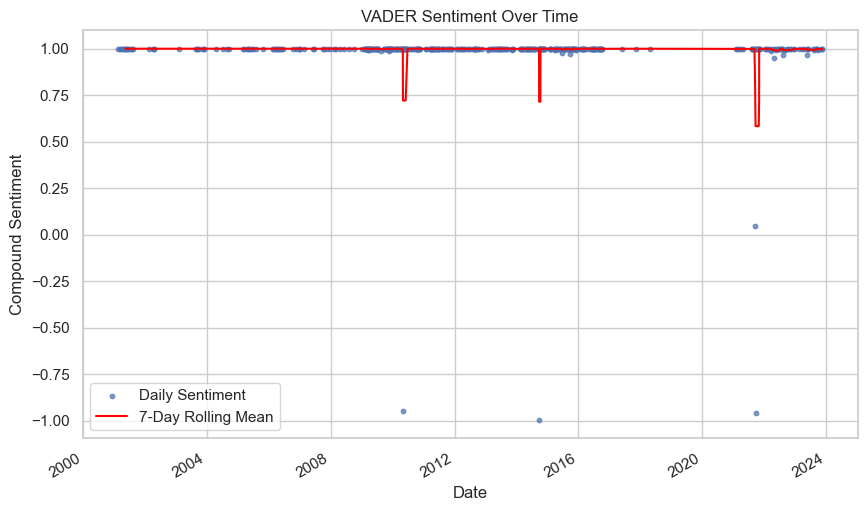

In [59]:
# Group by date and calculate the average compound sentiment
daily_sentiment = (
    df_sentiment_VADER.groupby(["date"])["compound"]
    .mean()
    .reset_index()
    .sort_values("date")
)

# plot figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot of daily sentiment
ax.scatter(daily_sentiment["date"], daily_sentiment["compound"], s=10, alpha=0.7, label="Daily Sentiment")

# rolling 7-day mean smoothed line
rolling_mean = daily_sentiment["compound"].rolling(window=7).mean()
ax.plot(daily_sentiment["date"], rolling_mean, color='red', label="7-Day Rolling Mean")

# Plotting
fig.autofmt_xdate()
ax.set_title("VADER Sentiment Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Compound Sentiment")
ax.legend()

plt.show()

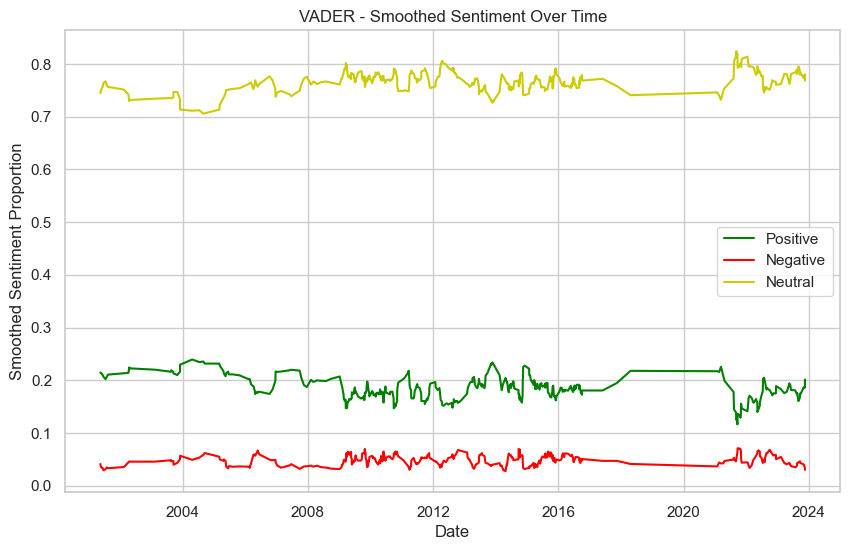

In [61]:
### Now, let's plot the distribution of negative, positive and neutral words in the text. Let's use a 7-day mean to smooth the curve

daily_sentiment = (
    df_sentiment_VADER.groupby(["date"])[["pos", "neg", "neu"]]
    .mean()
    .reset_index()
    .sort_values("date")
)

rolling_window_size = 7  # Adjust for diferent mean periods
for col in ["pos", "neg", "neu"]:
    daily_sentiment[f"smoothed_{col}"] = daily_sentiment[col].rolling(window=rolling_window_size).mean()

# Plotting
plt.figure(figsize=(10, 6))

# Plot the smoothed lines for each sentiment
sns.lineplot(x="date", y="smoothed_pos", data=daily_sentiment, label="Positive", color='green')
sns.lineplot(x="date", y="smoothed_neg", data=daily_sentiment, label="Negative", color='red')
sns.lineplot(x="date", y="smoothed_neu", data=daily_sentiment, label="Neutral", color='#CCCC00')

# Formatting
plt.title("VADER - Smoothed Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Smoothed Sentiment Proportion")
plt.legend()
plt.show()